In [1]:
import numpy as np
from fipy import CellVariable, Grid2D, DiffusionTerm
from fipy.tools import numerix
import matplotlib.pyplot as plt
import pickle 


epsilon = 1/8.

L = 1
nx = 1024
dx = L/nx
mesh = Grid2D(dx=dx, dy=dx, nx=nx, ny=nx)

boundary_value = 0.

var = CellVariable(mesh=mesh, name="variable")

var.constrain(boundary_value, mesh.facesLeft)
var.constrain(boundary_value, mesh.facesRight)
var.constrain(boundary_value, mesh.facesTop)
var.constrain(boundary_value, mesh.facesBottom)

k = numerix.sin(2*np.pi*mesh.x/epsilon)*numerix.cos(2*np.pi*mesh.y/epsilon) + 2

eq = (DiffusionTerm(coeff=k)+numerix.sin(mesh.x)+numerix.cos(mesh.y)==0)

eq.solve(var=var)


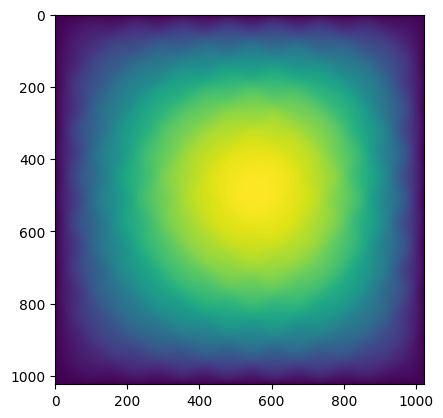

In [2]:
gt = np.array(var).reshape(nx,nx)
plt.imshow(gt)

In [3]:
with open('elliptic_2D_eps_1_8.pkl', 'wb') as file: 
    pickle.dump(gt, file) 

In [4]:
with open('elliptic_2D_eps_1_8.pkl', 'rb') as file: 
    myvar = pickle.load(file) 
  
    print(myvar) 

[[6.24192854e-07 1.62338657e-06 2.49541361e-06 ... 4.54675431e-06
  2.90799276e-06 1.10890426e-06]
 [1.63840278e-06 4.51477502e-06 7.09613110e-06 ... 1.28286622e-05
  8.01651375e-06 2.87886330e-06]
 [2.54705354e-06 7.17665529e-06 1.14031465e-05 ... 2.04981212e-05
  1.26647719e-05 4.44356639e-06]
 ...
 [1.66547346e-06 4.73790647e-06 7.57923712e-06 ... 1.62101322e-05
  9.99599462e-06 3.49760426e-06]
 [1.05900602e-06 2.95611386e-06 4.68579742e-06 ... 1.01231369e-05
  6.31068780e-06 2.25808006e-06]
 [3.95230918e-07 1.04953209e-06 1.63243992e-06 ... 3.57726421e-06
  2.28044491e-06 8.64686482e-07]]


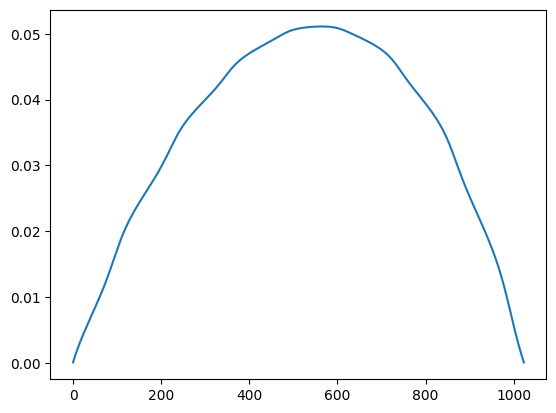

In [5]:
plt.plot(gt[500,:])